# Git Repository Bringup

In [2]:
!git version

git version 2.34.1


In [3]:
!git clone https://github.com/ramwtz/data-science-project.git

Cloning into 'data-science-project'...
remote: Enumerating objects: 157, done.
remote: Counting objects: 100% (157/157), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 157 (delta 70), reused 87 (delta 32), pack-reused 0
Receiving objects: 100% (157/157), 19.18 MiB | 18.27 MiB/s, done.
Resolving deltas: 100% (70/70), done.


In [4]:
!ls

data-science-project  sample_data


In [5]:
%cd data-science-project/

/content/data-science-project


In [6]:
!pwd

/content/data-science-project


In [7]:
!git switch dev/ram

Branch 'dev/ram' set up to track remote branch 'dev/ram' from 'origin'.
Switched to a new branch 'dev/ram'


In [8]:
!git pull

Already up to date.


In [9]:
%cd ..

/content


# Basic Bringup for Remote Environment

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# Necessary packages for this nb
!pip install --quiet --upgrade -r '/content/data-science-project/dependencies.txt'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 81.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 106.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 794.3/794.3 kB 54.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 118.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━

# Initialize Env

## Imports

In [146]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

time: 820 µs (started: 2023-10-01 12:46:49 +00:00)


## Configs

In [148]:
%load_ext autotime

pd.options.mode.chained_assignment = None  # default='warn'
tqdm.pandas()

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 1.34 ms (started: 2023-10-01 12:47:02 +00:00)


## Paths

In [13]:
gen_data_dir = os.path.join('drive', 'MyDrive', 'project', 'data')
calls_dir = os.path.join(gen_data_dir, 'calls')
new_data_dir = os.path.join(gen_data_dir, 'new')
models_path = os.path.join('drive', 'MyDrive', 'model')
metadata_path = os.path.join(calls_dir, '911_first6sec', '911_metadata_6sec.csv')

time: 674 µs (started: 2023-10-01 11:43:43 +00:00)


# Text-based CNN Model
Based on [[Mandelbaum and Shalev, 2016]](https://arxiv.org/pdf/1610.08229.pdf) using a random embedding.

## Creating Features and Classes

### Imports

In [32]:
from sklearn.model_selection import train_test_split
from sentence_transformers import SentenceTransformer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

time: 694 µs (started: 2023-10-01 11:55:46 +00:00)


### Defs

### Arranging the Data

In [91]:
metadata = pd.read_csv(metadata_path)
metadata.drop_duplicates(subset=['filename'], inplace=True)
metadata.reset_index(drop=True, inplace=True)
print(metadata.count())

id                 707
event_id           707
link               707
title              707
date               686
state              699
deaths             706
potential_death    706
false_alarm        706
description        699
deaths_binary      707
break              707
filename           707
dtype: int64
time: 19.3 ms (started: 2023-10-01 12:18:00 +00:00)


In [92]:
model_data = metadata[['filename', 'deaths_binary']]
model_data

,filename,deaths_binary
0,911_first6sec/call_2_0.wav,1
1,911_first6sec/call_8_0.wav,1
2,911_first6sec/call_9_0.wav,0
3,911_first6sec/call_10_0.wav,1
4,911_first6sec/call_11_0.wav,0
...,...,...
702,911_first6sec/call_739_0.wav,0
703,911_first6sec/call_740_0.wav,0
704,911_first6sec/call_741_0.wav,1
705,911_first6sec/call_742_0.wav,1


time: 8.95 ms (started: 2023-10-01 12:18:00 +00:00)


In [93]:
transcriptions_path = os.path.join(calls_dir, '911_first6sec', 'transcriptions')
transcriptions = pd.read_csv(transcriptions_path)
model_data['transcription'] = transcriptions['medium']
model_data

,filename,deaths_binary,transcription
0,911_first6sec/call_2_0.wav,1,My mom had a bad time.
1,911_first6sec/call_8_0.wav,1,Hello. Hello. Is everything okay? Um.
2,911_first6sec/call_9_0.wav,0,I need a police officer over here at 7th. Wha...
3,911_first6sec/call_10_0.wav,1,"Ma'am, my pickup was stolen. I had to go find..."
4,911_first6sec/call_11_0.wav,0,No ma'am I don't. I don't have an emergency. ...
...,...,...,...
702,911_first6sec/call_739_0.wav,0,She's not waking up. Okay. What's her address?
703,911_first6sec/call_740_0.wav,0,I just shot the Mormon bishop over here on Tu...
704,911_first6sec/call_741_0.wav,1,And this guy has a gun in my hat. I need the ...
705,911_first6sec/call_742_0.wav,1,There are like at least four or five people w...


time: 17.6 ms (started: 2023-10-01 12:18:00 +00:00)


In [94]:
transcriptions['len'] = model_data['transcription'].apply(lambda x: len(str(x).split(' ')))
print("mean length of sentence: " + str(transcriptions.len.mean()))
print("max length of sentence: " + str(transcriptions.len.max()))
print("std dev length of sentence: " + str(transcriptions.len.std()))

mean length of sentence: 15.946251768033946
max length of sentence: 33
std dev length of sentence: 5.64807841263026
time: 4.52 ms (started: 2023-10-01 12:18:00 +00:00)


In [95]:
sequence_length = transcriptions.len.max()

time: 524 µs (started: 2023-10-01 12:18:00 +00:00)


In [96]:
max_features = 20000

tokenizer = Tokenizer(num_words=max_features, split=' ', oov_token='<unw>')
tokenizer.fit_on_texts(model_data['transcription'].values)
features = tokenizer.texts_to_sequences(model_data['transcription'].values)
# TODO maybe pad interlacing instead of in the begininng?
features = pad_sequences(features, sequence_length)
print(features)

[[  0   0   0 ...   4 364 365]
 [  0   0   0 ... 366  15  72]
 [  0   0   0 ...  41  34  10]
 ...
 [  0   0   0 ...   5 728 675]
 [  0   0   0 ...  13   2 729]
 [  0   0   0 ...   6 132  35]]
time: 35.4 ms (started: 2023-10-01 12:18:00 +00:00)


In [97]:
classes = pd.get_dummies(model_data['deaths_binary'], dtype='uint8').values
classes

array([[0, 1],
       [0, 1],
       [1, 0],
       ...,
       [0, 1],
       [0, 1],
       [1, 0]], dtype=uint8)

time: 4.37 ms (started: 2023-10-01 12:18:00 +00:00)


In [98]:
model_data['vatorization'] = pd.Series(X.tolist())
model_data['classes'] = pd.Series(y.tolist())
model_data.drop('deaths_binary', inplace=True, axis=1, errors='ignore')
model_data

,filename,transcription,vatorization,classes
0,911_first6sec/call_2_0.wav,My mom had a bad time.,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1]"
1,911_first6sec/call_8_0.wav,Hello. Hello. Is everything okay? Um.,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1]"
2,911_first6sec/call_9_0.wav,I need a police officer over here at 7th. Wha...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0]"
3,911_first6sec/call_10_0.wav,"Ma'am, my pickup was stolen. I had to go find...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1]"
4,911_first6sec/call_11_0.wav,No ma'am I don't. I don't have an emergency. ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0]"
...,...,...,...,...
702,911_first6sec/call_739_0.wav,She's not waking up. Okay. What's her address?,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0]"
703,911_first6sec/call_740_0.wav,I just shot the Mormon bishop over here on Tu...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0]"
704,911_first6sec/call_741_0.wav,And this guy has a gun in my hat. I need the ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 31, 81, 1...","[0, 1]"
705,911_first6sec/call_742_0.wav,There are like at least four or five people w...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 42, 30...","[0, 1]"


time: 19 ms (started: 2023-10-01 12:18:00 +00:00)


In [100]:
X_train, X_test, y_train, y_test = train_test_split(
    features, classes, test_size=0.25, shuffle=True, stratify=classes,
    random_state=0
    )

time: 31.7 ms (started: 2023-10-01 12:18:25 +00:00)


In [104]:
print(X_train)

[[   0    0    0 ...    7    2  414]
 [   0    0    0 ...   36  668  133]
 [   0    0    0 ...   31 1144   56]
 ...
 [   0    0    0 ...  111 1618 1619]
 [   0    0    0 ...    7    4   19]
 [   0    0    0 ...   16 1003 1004]]
time: 6.5 ms (started: 2023-10-01 12:19:30 +00:00)


In [103]:
print(y_train)

[[0 1]
 [1 0]
 [1 0]
 ...
 [0 1]
 [0 1]
 [0 1]]
time: 8.32 ms (started: 2023-10-01 12:19:29 +00:00)


## Model Training

### Imports

In [110]:
from tensorflow.keras import models, layers, optimizers, callbacks, regularizers
from tensorflow.keras.utils import plot_model

time: 595 µs (started: 2023-10-01 12:25:23 +00:00)


### Train

In [167]:
def cnn_model(embedding_dim, num_filters, dropout_rate=0.5,
              loss='categorical_crossentropy',  optimizer_name='Adam',
              learning_rate=0.001):
  #
  inputs = layers.Input(shape=(sequence_length,), dtype='int32')

  #
  emb_layr = layers.Embedding(
      input_dim=max_features, output_dim=embedding_dim, input_length=sequence_length)(inputs)

  #
  reshape = layers.Reshape((sequence_length, embedding_dim, 1))(emb_layr)

  #
  conv_0 = layers.Conv2D(num_filters, kernel_size=(3, embedding_dim), activation='relu', kernel_regularizer=regularizers.l2(3))(reshape)
  maxpool_0 = layers.MaxPool2D(pool_size=(sequence_length - 3 + 1, 1), strides=(1,1), padding='valid')(conv_0)

  #
  conv_1 = layers.Conv2D(num_filters, kernel_size=(4, embedding_dim), activation='relu', kernel_regularizer=regularizers.l2(3))(reshape)
  maxpool_1 = layers.MaxPool2D(pool_size=(sequence_length - 4 + 1, 1), strides=(1,1), padding='valid')(conv_1)

  #
  conv_2 = layers.Conv2D(num_filters, kernel_size=(5, embedding_dim), activation='relu', kernel_regularizer=regularizers.l2(3))(reshape)
  maxpool_2 = layers.MaxPool2D(pool_size=(sequence_length - 5 + 1, 1), strides=(1,1), padding='valid')(conv_2)

  #
  concatenated_tensor = layers.Concatenate(axis=1)([maxpool_0, maxpool_1, maxpool_2])
  flatten = layers.Flatten()(concatenated_tensor)

  #
  dropout = layers.Dropout(dropout_rate)(flatten)

  #
  output = layers.Dense(units=2, activation='softmax')(dropout)

  opt = getattr(optimizers, optimizer_name)
  tm = models.Model(inputs=inputs, outputs=output)
  tm.compile(loss=loss, optimizer=opt(learning_rate), metrics=['accuracy'])

  return tm

time: 2.2 ms (started: 2023-10-01 15:32:37 +00:00)


In [177]:
embedding_dim = 200
num_filters = 100

text_model = cnn_model(embedding_dim, num_filters)
print(text_model.summary())

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 33)]                 0         []                            
                                                                                                  
 embedding_9 (Embedding)     (None, 33, 200)              4000000   ['input_10[0][0]']            
                                                                                                  
 reshape_9 (Reshape)         (None, 33, 200, 1)           0         ['embedding_9[0][0]']         
                                                                                                  
 conv2d_24 (Conv2D)          (None, 31, 1, 100)           60100     ['reshape_9[0][0]']           
                                                                                            

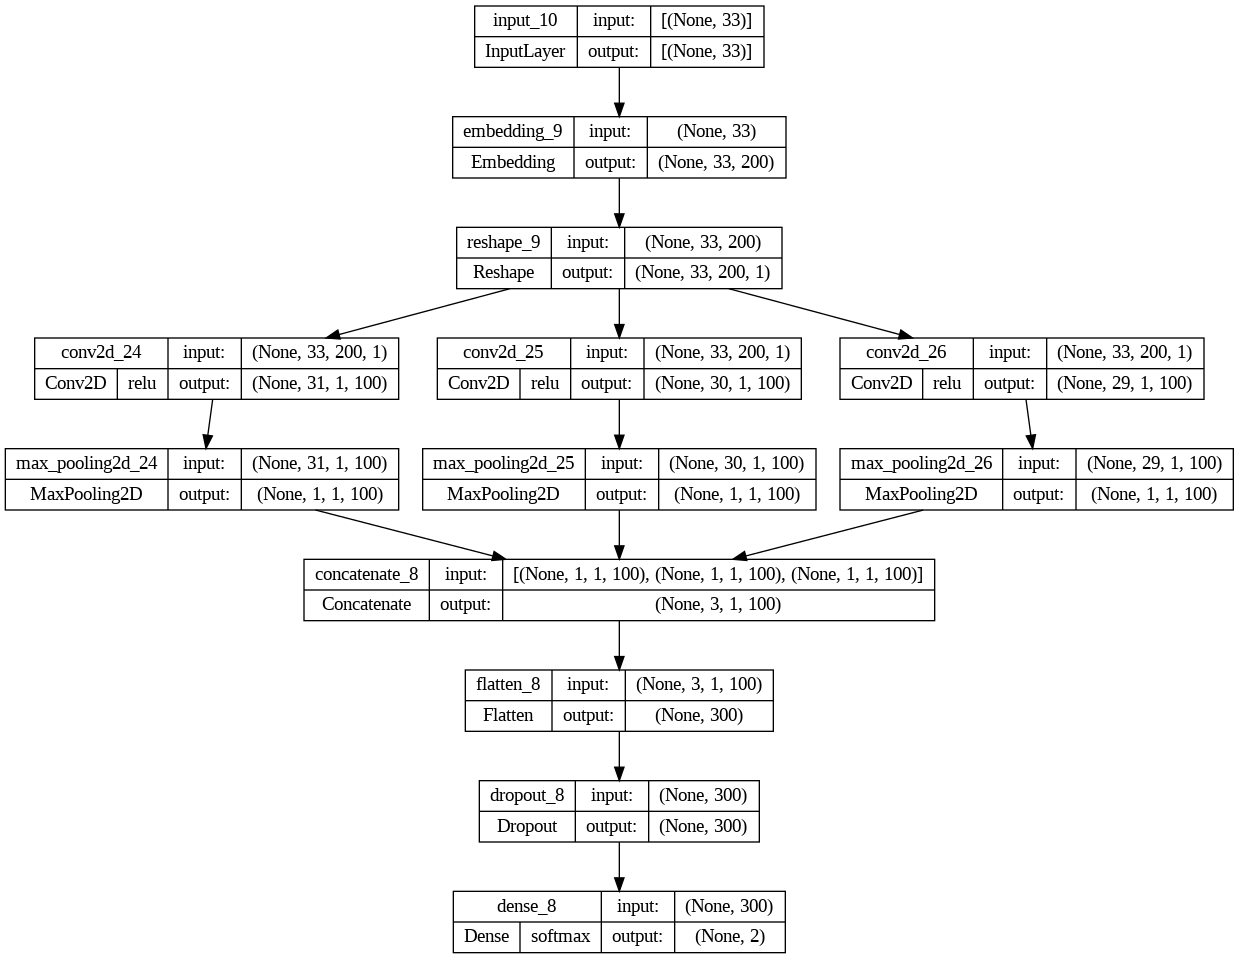

time: 105 ms (started: 2023-10-01 15:36:55 +00:00)


In [178]:
plot_model(text_model, show_shapes=True, show_layer_activations=True)

In [179]:
verbosity = 1
batch_size = 32
epochs = 25

# define callbacks
reduce_lr_callback = callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=10, min_lr=0.0005,
    verbose=verbosity)

earlystopping = callbacks.EarlyStopping(
    monitor="val_loss",
    restore_best_weights=True,
    min_delta=0.00001,
    verbose=verbosity)

text_history = text_model.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=0.1,
    shuffle=True,
    verbose=verbosity)

Epoch 1/25
15/15 [==============================] - 3s 121ms/step - loss: 4.6833 - accuracy: 0.5723 - val_loss: 2.1514 - val_accuracy: 0.6981
Epoch 2/25
15/15 [==============================] - 2s 102ms/step - loss: 1.3064 - accuracy: 0.5786 - val_loss: 0.8934 - val_accuracy: 0.6981
Epoch 3/25
15/15 [==============================] - 2s 110ms/step - loss: 0.8157 - accuracy: 0.5786 - val_loss: 0.6952 - val_accuracy: 0.6981
Epoch 4/25
15/15 [==============================] - 2s 114ms/step - loss: 0.7116 - accuracy: 0.5786 - val_loss: 0.6556 - val_accuracy: 0.6981
Epoch 5/25
15/15 [==============================] - 2s 107ms/step - loss: 0.6893 - accuracy: 0.5786 - val_loss: 0.6506 - val_accuracy: 0.6981
Epoch 6/25
15/15 [==============================] - 1s 88ms/step - loss: 0.6839 - accuracy: 0.5786 - val_loss: 0.6437 - val_accuracy: 0.6981
Epoch 7/25
15/15 [==============================] - 1s 66ms/step - loss: 0.6842 - accuracy: 0.5786 - val_loss: 0.6459 - val_accuracy: 0.6981
Epoch 8/

## Model Assessment

### Imports

In [123]:
from sklearn import metrics

time: 526 µs (started: 2023-10-01 12:34:58 +00:00)


### Fitting Progression

In [180]:
fit_history = pd.DataFrame(text_history.history)
print(f'Number of Actual Epochs: {fit_history.shape[0]}')

Number of Actual Epochs: 25
time: 3.87 ms (started: 2023-10-01 15:37:39 +00:00)


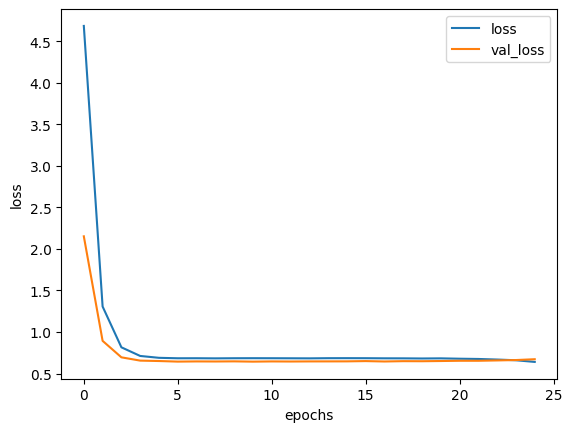

time: 263 ms (started: 2023-10-01 15:37:40 +00:00)


In [181]:
loss_history = fit_history[['loss','val_loss']]
loss_history.plot(title='', xlabel='epochs', ylabel='loss')
plt.show()

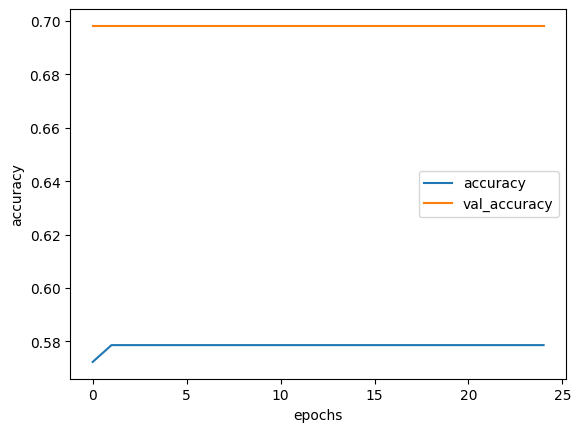

time: 176 ms (started: 2023-10-01 15:37:43 +00:00)


In [182]:
accuracy_history = fit_history[['accuracy','val_accuracy']]
accuracy_history.plot(
    title='', xlabel='epochs', ylabel='accuracy')
plt.show()

### Evaluation

In [183]:
# create assessment values
y_probability = text_model.predict(X_test, verbose=0)
y_test_binary = np.argmax(y_test, axis=-1)
y_predicted_binary = np.argmax(y_probability, axis=-1)

time: 232 ms (started: 2023-10-01 15:37:57 +00:00)


In [184]:
test_accuracy = text_model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {test_accuracy[0]}')
print(f'Test Accuracy: {test_accuracy[1]}')

Test loss: 0.7073350548744202
Test Accuracy: 0.5932203531265259
time: 232 ms (started: 2023-10-01 15:37:58 +00:00)


In [185]:
small_model_report = metrics.classification_report(
    y_test_binary, y_predicted_binary, digits=4,
    target_names=['Non-Fatal','Fatal'])
print(small_model_report)

              precision    recall  f1-score   support

   Non-Fatal     0.0000    0.0000    0.0000        72
       Fatal     0.5932    1.0000    0.7447       105

    accuracy                         0.5932       177
   macro avg     0.2966    0.5000    0.3723       177
weighted avg     0.3519    0.5932    0.4418       177

time: 19.4 ms (started: 2023-10-01 15:38:00 +00:00)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


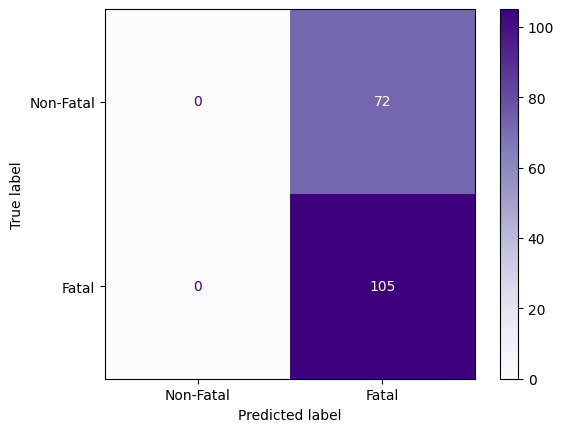

time: 480 ms (started: 2023-10-01 15:38:06 +00:00)


In [186]:
metrics.ConfusionMatrixDisplay.from_predictions(
    y_test_binary, y_predicted_binary,
    display_labels=['Non-Fatal','Fatal'],
    cmap='Purples')
plt.show()

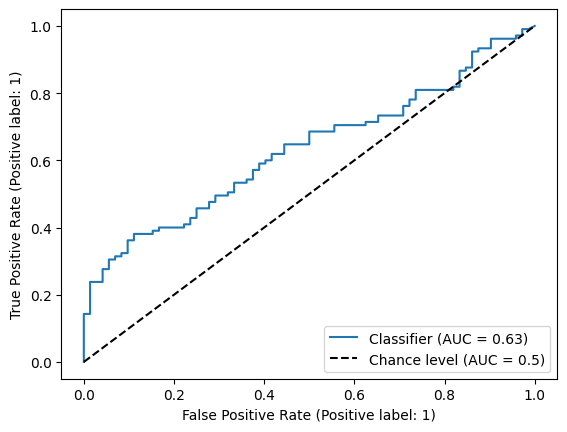

time: 167 ms (started: 2023-10-01 15:38:09 +00:00)


In [187]:
metrics.RocCurveDisplay.from_predictions(
    y_test_binary, y_probability[:, 1], plot_chance_level=True)
plt.show()